In [13]:
from memote.suite.api import test_model
from memote.suite.cli.callbacks import validate_experimental
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [3]:
sns.set_style('white')
sns.set_context("poster", font_scale = 1.5)

In [4]:
from syn_elong import model as syn, exp_file_path as syn_exp_file

Set parameter Username
Set parameter GURO_PAR_SPECIAL
Set parameter TokenServer to value "leghorn"


In [5]:
def run_tests(model, exp_file):
    exp = validate_experimental(None, None, exp_file)
    err, result = test_model(
        model, 
        sbml_version = None, 
        results = True, 
        pytest_args = None, 
        exclusive = ['test_growth_from_data_qualitative', 'test_gene_essentiality_from_data_qualitative'],
        experimental = exp,
        solver_timeout = 10
    )
    # print(err, result)
    return result

In [6]:
syn_results = run_tests(syn, syn_exp_file)

============================= test session starts =============================
platform win32 -- Python 3.10.6, pytest-6.2.5, py-1.11.0, pluggy-0.13.1
rootdir: C:\Users\pino216
plugins: anyio-3.6.2
collected 299 items / 1 skipped / 298 selected

..\..\..\..\Miniconda3\envs\whole-cell-gemm\lib\site-packages\memote\suite\tests\test_annotation.py s [  0%]
ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss         [ 21%]
..\..\..\..\Miniconda3\envs\whole-cell-gemm\lib\site-packages\memote\suite\tests\test_basic.py s [ 22%]
ssssssssssssssssssssss                                                   [ 29%]
..\..\..\..\Miniconda3\envs\whole-cell-gemm\lib\site-packages\memote\suite\tests\test_biomass.py s [ 29%]
ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss [ 53%]
ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss [ 77%]
ssssssssssssssssss                                                       [ 83%]
..\..\..\..\Miniconda3\envs\whole-

In [17]:
cm = []
for i, d in syn_results['tests']['test_gene_essentiality_from_data_qualitative']['data'].items():
    cm.append(len(d['TP']))
    cm.append(len(d['FN']))
    cm.append(len(d['FP']))
    cm.append(len(d['TN']))
    for j , k in d.items():
        if isinstance(k, list):
            continue
        else:
            print('syn', i, j, k)

syn knockouts TPR 0.8220551378446115
syn knockouts TNR 0.6321243523316062
syn knockouts PPV 0.6978723404255319
syn knockouts FDR 0.3021276595744681
syn knockouts ACC 0.7286624203821656
syn knockouts MCC 0.463237183887999


In [18]:
# reshape to square
cm = np.array(cm).reshape((2,2))

In [19]:
print(cm)

[[328  71]
 [142 244]]


meta NOT subset; don't know how to subset; dropped


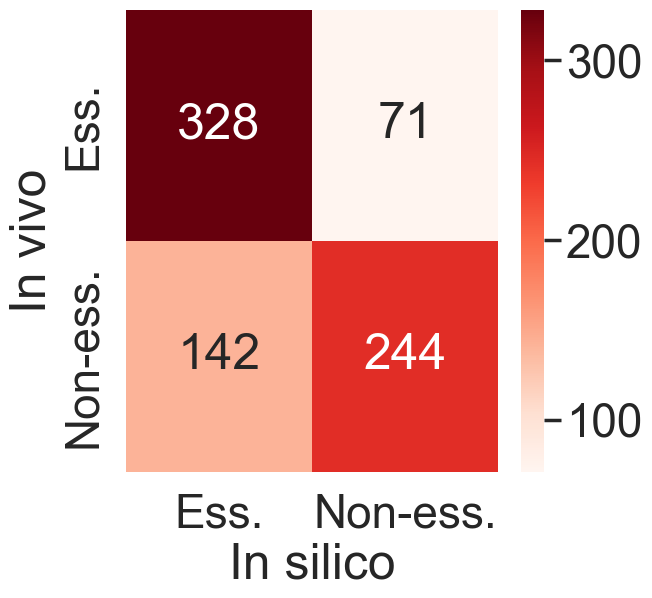

In [20]:
# simple heatmap. Scikit learn has one but don't use confusion class, so labels are off
plt.figure(figsize=(6,6))
g = sns.heatmap(cm, annot=True, fmt='0.0f', cmap='Reds')
g.set_xlabel("In silico");
g.set_ylabel("In vivo");
g.set_xticks([0.5,1.5], ['Ess.', 'Non-ess.']);
g.set_yticks([0.5,1.5], ['Ess.', 'Non-ess.']);
plt.savefig("confusion_matrix.png", bbox_inches='tight', dpi=300)
plt.savefig("confusion_matrix.pdf", bbox_inches='tight', dpi=300)

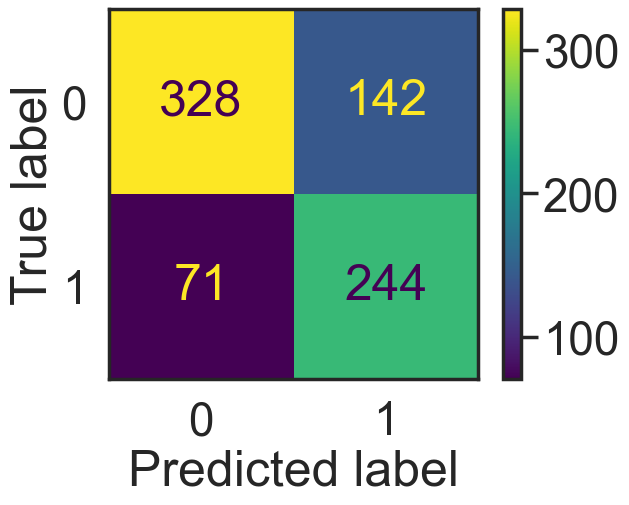

In [11]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()